In [1]:
import os

import pandas as pd

from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer

import config

# Print data example with complete content of column 'review'
pd.set_option('display.max_colwidth', None)

# **Consort - Formation NLP**

## Introduction - Analyse de sentiments

Objectif: Déterminer le sentiment d'un texte à l'aide de différentes techniques.

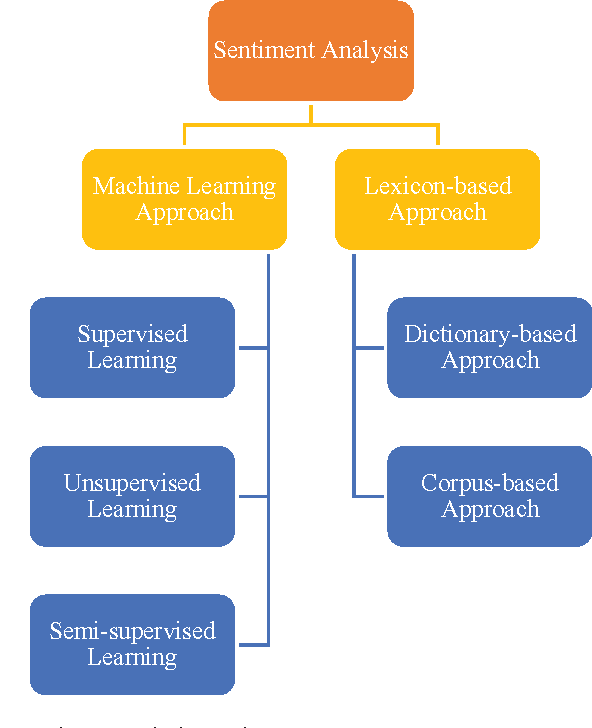






### Approche lexicale 
(*Lexicon or Rule-Based approach*)
  - RegEx
  - NLTK
  - SpaCy

### Machine Learning
  - Modèles à taille fixe
    - Bag of words
  - Modèles réccurents
    - CBOW
  - Modèles transformeurs
    - À affiner (fine-tune)
    - HuggingFace Sentiment Analysis
    - Google's API (sans création de compte)



# Données

Jeu de données pour l'analyse de sentiments: Avis des utilisateurs d'Allociné.fr disponible ici: https://github.com/TheophileBlard/french-sentiment-analysis-with-bert/tree/master/allocine_dataset

Il contient 100 000 avis positifs et 100 000 avis négatifs répartis en 3 répartitions équilibrées : train (160 000 avis), val (20 000) et test (20 000).

**NOTE:** Afin d'optimiser le temps de calcul pour cet exercice, nous allons réduire l'ensemble test 1000. 

In [2]:
# Load data
train_data = pd.read_csv(config.base_dir + '/Data/train_data.csv')
val_data = pd.read_csv(config.base_dir + '/Data/val_data.csv')
test_data = pd.read_csv(config.base_dir + '/Data/prepro_test_data.csv', usecols=['review', 'polarity'])


## Mots -> Vecteurs

### Bag of words

In [3]:
# Create a bag of words representation for our train data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['review'])


In [4]:
print(train_data['review'][0])
print(X_train[0])

Si vous cherchez du cinéma abrutissant à tous les étages,n'ayant aucune peur du cliché en castagnettes et moralement douteux,"From Paris with love" est fait pour vous.Toutes les productions Besson,via sa filière EuropaCorp ont de quoi faire naître la moquerie.Paris y est encore une fois montrée comme une capitale exotique,mais attention si l'on se dirige vers la banlieue,on y trouve tout plein d'intégristes musulmans prêts à faire sauter le caisson d'une ambassadrice américaine.Nauséeux.Alors on se dit qu'on va au moins pouvoir apprécier la déconnade d'un classique buddy-movie avec le jeune agent aux dents longues obligé de faire équipe avec un vieux lou complètement timbré.Mais d'un côté,on a un Jonathan Rhys-meyers fayot au possible,et de l'autre un John Travolta en total délire narcissico-badass,crâne rasé et bouc proéminent à l'appui.Sinon,il n'y a aucun scénario.Seulement,des poursuites débiles sur l'autoroute,Travolta qui étale 10 mecs à l'arme blanche en 8 mouvements(!!)ou laiss

In [5]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names[[127232, 25546, 51778]])

['si' 'cherchez' 'est']


# Training

## Naive Bayes

In [6]:
# Train a Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB()
clf_NB.fit(X_train, train_data['polarity'])


MultinomialNB()

In [7]:
# Make predictions for the validation set
X_val = vectorizer.transform(val_data['review'])
y_pred = clf_NB.predict(X_val)

# Evaluate the predictions
print(classification_report(val_data['polarity'], y_pred)) 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     10204
           1       0.91      0.87      0.89      9796

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



## Logistic Regression

In [9]:
# Train a Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression(max_iter=1000)
clf_LR.fit(X_train, train_data['polarity'])

/home/myuser/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [10]:
# Make predictions for the validation set
y_pred = clf_LR.predict(X_val)

# Evaluate the predictions
print(classification_report(val_data['polarity'], y_pred))


              precision    recall  f1-score   support

           0       0.93      0.92      0.92     10204
           1       0.91      0.93      0.92      9796

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



## Random Forest

In [4]:
# Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=100)
clf_RF.fit(X_train, train_data['polarity'])


RandomForestClassifier()

In [7]:
# Make predictions for the validation set
y_pred = clf_RF.predict(X_val)

# Evaluate the predictions
print(classification_report(val_data['polarity'], y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     10204
           1       0.90      0.88      0.89      9796

    accuracy                           0.89     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.89      0.89      0.89     20000



## Analyse

Importance de la liste de mots...
Importance du threshold... 


L'utilisation de dictionnaires est probablement le moyen le plus simple d'effectuer cette analyse des sentiments. Cependant, il échoue encore souvent à gérer toutes les complexités du langage.

Par exemple, considérons une phrase simple comme "il fait très chaud". Il n'exprime aucun sentiment en soi. Néanmoins, on peut le considérer comme négatif lorsqu'on parle d'un ordinateur portable, et positif lorsqu'on parle d'un réchaud.

De plus, ces systèmes doivent gérer correctement les négations et autres variations de langage qui peuvent modifier le sentiment des mots autrement pris isolément.

Enfin et surtout, le texte peut souvent contenir du sarcasme qui est vraiment difficile à détecter automatiquement et peut fausser les résultats d'un algorithme d'analyse des sentiments.

Sur la base de ces considérations, si des données de formation sont disponibles, il est généralement plus souhaitable d'utiliser une approche basée sur l'apprentissage automatique, qui surpasse souvent les méthodes basées sur un dictionnaire.

## Save results

### By example

In [6]:
pred_test_data = test_data[['ID', 'review', 'polarity', 'token_pred', 'stem_pred', 'lem_pred']]

# Turn bool in int
pred_test_data.loc[:,'token_pred'] = pred_test_data['token_pred'].astype(int)
pred_test_data.loc[:,'stem_pred'] = pred_test_data['stem_pred'].astype(int)
pred_test_data.loc[:,'lem_pred'] = pred_test_data['lem_pred'].astype(int)

# Save predictions
pred_test_data.to_csv(config.base_dir + '/Data/pred_test_data.csv', index=False)

pred_test_data.head()

,ID,review,polarity,token_pred,stem_pred,lem_pred
0,0,"Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)",1,1,1,1
1,1,"Je n'ai pas aimé mais pourtant je lui mets 2 étoiles car l'expérience est louable. Rien de conventionnel ici. Une visite E.T. mais jonchée d'idées /- originales. Le soucis, tout ceci avait-il vraiment sa place dans un film de S.F. tirant sur l'horreur ? Voici un film qui, à l'inverse de tant d'autres qui y ont droit, mériterait peut-être un remake.",0,0,0,0
2,2,Un dessin animé qui brille par sa féerie et ses chansons.,1,1,1,1
3,3,"Si c'est là le renouveau du cinéma français, c'est tout de même foutrement chiant. Si l'objet est très stylisé et la tension palpable, le film paraît plutôt creux.",0,0,0,0
4,4,"Et pourtant on s’en Doutait !Second volet très mauvais, sans fraîcheur et particulièrement lourdingue. Quel dommage.",0,0,0,0


### Comparaison analysis

In [7]:
# For the 3 different techniques, calculate the accuracy and F1 score
accuracy = []
f1 = []
for tech in ['token_', 'stem_', 'lem_']:
    accuracy.append(accuracy_score(test_data['polarity'], test_data[tech+'pred']))
    f1.append(f1_score(test_data['polarity'], test_data[tech+'pred'], average='micro'))

df_comparsion = pd.DataFrame({'accuracy': accuracy, 'f1': f1}, index=['lexi_token', 'lexi_stem', 'lexi_lem'])
df_comparsion.sort_values('accuracy', ascending=False, inplace=True)

df_comparsion


,accuracy,f1
lexi_token,0.648,0.648
lexi_lem,0.648,0.648
lexi_stem,0.645,0.645


In [9]:
# Check if comparsion_analysis.csv already exists 
if os.path.exists(config.base_dir + '/Data/comparsion_analysis.csv'):
    # If yes, read it and update it with the new results
    df_comparsion_old = pd.read_csv(config.base_dir + '/Data/comparsion_analysis.csv', index_col=0)
    print(df_comparsion_old)
    df_comparsion_old.update(df_comparsion)
    df_comparsion_combined = pd.concat([df_comparsion_old, df_comparsion[~df_comparsion.index.isin(df_comparsion_old.index)]])
    df_comparsion_combined.sort_values('accuracy', ascending=False, inplace=True)
    # Save the updated DataFrame back to the CSV file
    df_comparsion_combined.to_csv(config.base_dir + '/Data/comparsion_analysis.csv')
    print(df_comparsion_combined)
else:
    df_comparsion.to_csv(config.base_dir + '/Data/comparsion_analysis.csv', index=True)

            accuracy     f1
lexi_token     0.648  0.648
lexi_lem       0.648  0.648
lexi_stem      0.645  0.645
            accuracy     f1
lexi_token     0.648  0.648
lexi_lem       0.648  0.648
lexi_stem      0.645  0.645
